# 🖌️🖌️🖌️ Handwriting Recognization 🖌️🖌️🖌️

## To get the Datset go on [kaggle](https://www.kaggle.com/datasets/ashutoshkumarcse52/hand-writing-detection-dataset)

## This notebook will helpful to understand and recognise the handwritting and helpful to predict the right number from the test data set.

# ♨️♨️♨️ Importing Library ♨️♨️♨️

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset : Both the dataset contain the pixel values of the image we provide training to our model by train dataset and then test the accuracy of the model by test dataset

In [7]:
test = pd.read_csv('test.csv')

In [8]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train = pd.read_csv('train.csv')

In [11]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train.shape

(42000, 785)

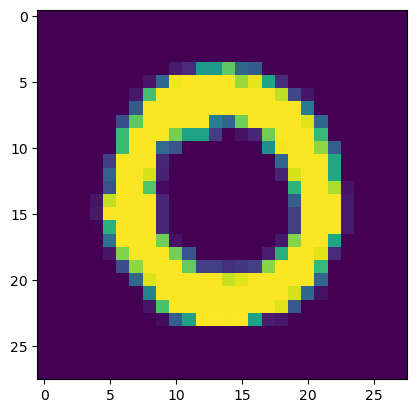

In [15]:
## show the image by the pixel value with help of matplotlib 

num = np.array(train.iloc[1,1:]).reshape(28,28)
plt.imshow(num)
plt.show()

In [16]:
arr = train.iloc[1,1:]


(array([566.,  17.,  12.,  11.,   3.,   9.,   9.,  11.,   7., 139.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

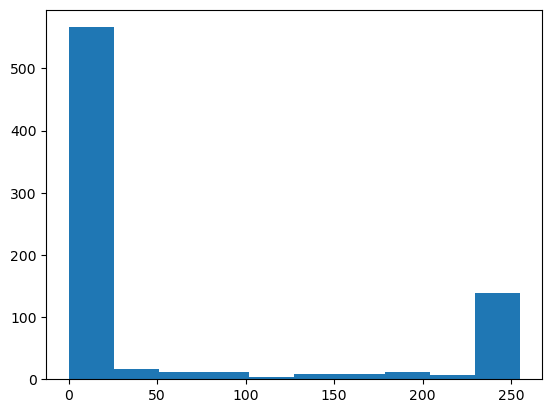

In [17]:
plt.hist(arr)

In [18]:
max(arr)

255

## Missing Value

In [19]:
missing_val_count = train.isnull().sum()

In [20]:
missing_val_count

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## ♨️♨️♨️Feature Engineering♨️♨️♨️

#### Feature engineering is a critical aspect of machine learning and data analysis where you create new features or transform existing ones to enhance the performance of a predictive model. It involves selecting, modifying, or creating new features from the raw data that make it easier for machine learning algorithms to interpret patterns and make accurate predictions.

here lots of dimention are already present and all are important so can't reduce thats why generate own new dimentions for the model

In [22]:
x = np.array(train)
y = np.array(test)

x_train = x[:,1:]
y_train = x[:,0]
x_test = y

In [29]:
import tensorflow as tf

### TensorFlow Keras is an open-source deep learning framework that is part of the TensorFlow ecosystem. It provides a high-level API for building and training neural networks and other machine learning models. Keras was originally developed as a standalone library, but it has been integrated into TensorFlow to provide a more streamlined and cohesive experience for deep learning development.

## tensorflow.keras.preprocessing.image 

it will help to work with image or pixel values.

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
x_train = x_train.reshape(-1,28,28,1)

In [33]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    shear_range = 0.1
)

datagen.fit(x_train)


In [34]:
x_train = x_train.reshape(-1,784)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

#### here we predict the image by KNN algorith on the test dataset randomly

In [38]:
int(knn.predict(x_test[100].reshape(1,-1)))

0

#### here we test the prediction is right or wrong : and our prediction is 100% right

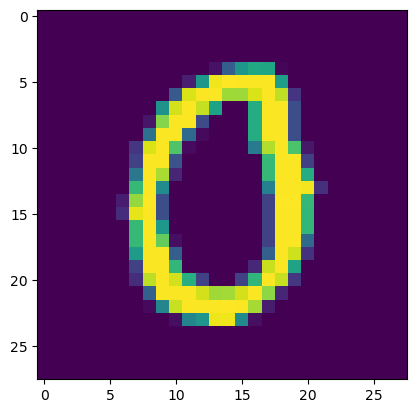

In [41]:
num = np.array(test.iloc[100,:]).reshape(28,28)
plt.imshow(num)
plt.show()